In [1]:
%load_ext autoreload
%autoreload 2

(4392, 7372, 3)


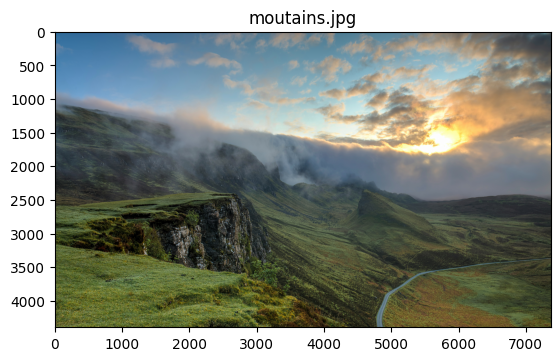

float64


In [3]:
from res.python.image import load_image, display_image
from res.python.transforms import resize
import numpy as np

img= load_image('./test_image.jpg', normalize=True)
print(img.shape)
display_image(img, 'moutains.jpg')
print(img.dtype)

(1080, 1920, 3)
(360, 640, 3)


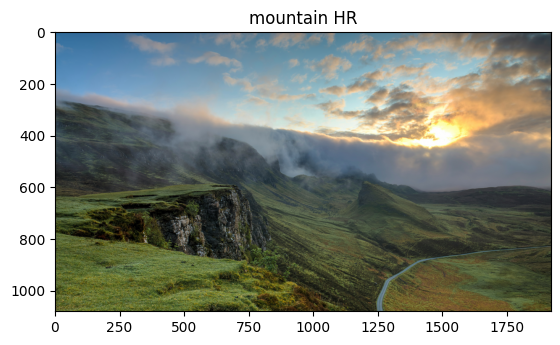

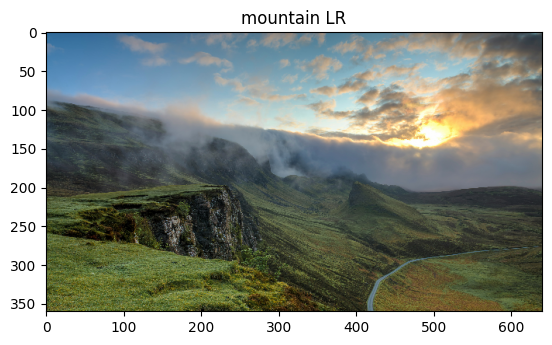

In [5]:
from res.python.transforms import quadratic_bspline

img_hr= resize(img, (1080, 1920), interp='wavelet', kernel_func=quadratic_bspline)
img_lr= resize(img, (360, 640), interp='wavelet', kernel_func=quadratic_bspline)

print(img_hr.shape)
print(img_lr.shape)

display_image(img_hr, 'mountain HR')
display_image(img_lr, 'mountain LR')

In [8]:
import cv2

final_image_LR= np.astype(img_lr*255, np.uint8)
final_image_HR= np.astype(img_hr*255, np.uint8)
cv2.imwrite('./images/LR/mountain.png', cv2.cvtColor(final_image_LR, cv2.COLOR_BGR2RGB))
cv2.imwrite('./images/HR/mountain.png', cv2.cvtColor(final_image_HR, cv2.COLOR_BGR2RGB))

True

In [19]:
from res.python.self_similarity import small_SR

img_ss= img_lr.copy()
for i in range(5):
    img_ss= small_SR(img_ss, 1.25)

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 10.82 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 17.13 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 26.91 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in -48491.74 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Final

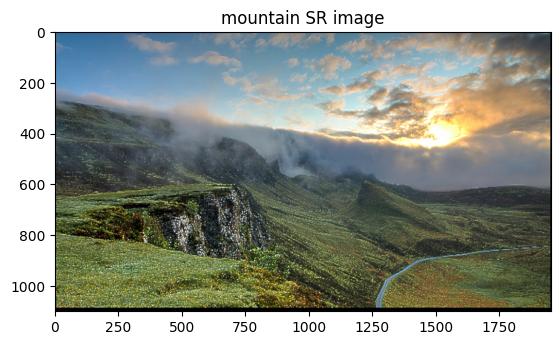

(1100, 1954, 3)

In [27]:
display_image(img_ss, 'mountain SR image')
img_ss.shape

In [30]:
import cv2
final_img= (np.clip(img_ss, 0.0,1.0)*255).astype(np.uint8)
cv2.imwrite('./images/SR/mountain.png', cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))

True